In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from dark_emulator_public import dark_emulator
import os, sys, time, json, copy
import matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp2d, interp1d
from scipy.integrate import simps
from tqdm import tqdm
import hsc3x2pt
import joblib

using dark_emulator at  /lustre/work/sunao.sugiyama/package/dark_emulator_public/dark_emulator/__init__.py


In [3]:
fishers_dict = od()

## Instantiate Fisher classes

### Year **1** single source bin

In [4]:
fisher1x2pt = joblib.load('FisherMats/single_source_ClY1IA/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/single_source_ClY1IA/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/single_source_ClY1IA/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01, 100, 100], # to avoid singular Fisher matrix of 2x2pt at A_IA param.
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm', 'A_IA', 'eta_IA'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph','dm'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm'], label='Prior')

fishers_dict['Y1IAsingle2x2pt'] = fisher2x2pt
fishers_dict['Y1IAsingle1x2pt'] = fisher1x2pt
fishers_dict['Y1IAsingle3x2pt'] = fisher3x2pt
fishers_dict['Y1IAsingle2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y1IAsingle1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y1IAsingle3x2ptPrior'] = fisher3x2ptPrior

### year 1 double source bins

In [5]:
fisher1x2pt = joblib.load('FisherMats/double_source_ClY1IA/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/double_source_ClY1IA/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/double_source_ClY1IA/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01, 100, 100], # to avoid singular Fisher matrix of 2x2p
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2', 'A_IA', 'eta_IA'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fishers_dict['Y1IAdouble2x2pt'] = fisher2x2pt
fishers_dict['Y1IAdouble1x2pt'] = fisher1x2pt
fishers_dict['Y1IAdouble3x2pt'] = fisher3x2pt
fishers_dict['Y1IAdouble2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y1IAdouble1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y1IAdouble3x2ptPrior'] = fisher3x2ptPrior

### Year 1 quadruple source bins

In [6]:
fisher1x2pt = joblib.load('FisherMats/quadruple_source_ClY1IA/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/quadruple_source_ClY1IA/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/quadruple_source_ClY1IA/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01, 100, 100], # to avoid singular Fisher matrix of 2x2p
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4', 'A_IA', 'eta_IA'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fishers_dict['Y1IAquadruple2x2pt'] = fisher2x2pt
fishers_dict['Y1IAquadruple1x2pt'] = fisher1x2pt
fishers_dict['Y1IAquadruple3x2pt'] = fisher3x2pt
fishers_dict['Y1IAquadruple2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y1IAquadruple1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y1IAquadruple3x2ptPrior'] = fisher3x2ptPrior

### Year **3** single source bin

In [7]:
fisher1x2pt = joblib.load('FisherMats/single_source_ClY3IA/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/single_source_ClY3IA/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/single_source_ClY3IA/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01, 100, 100], # to avoid singular Fisher matrix of 2x2pt at A_IA param.
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm', 'A_IA', 'eta_IA'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph','dm'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm'], label='Prior')

fishers_dict['Y3IAsingle2x2pt'] = fisher2x2pt
fishers_dict['Y3IAsingle1x2pt'] = fisher1x2pt
fishers_dict['Y3IAsingle3x2pt'] = fisher3x2pt
fishers_dict['Y3IAsingle2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3IAsingle1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3IAsingle3x2ptPrior'] = fisher3x2ptPrior

In [19]:
fisher1x2pt = joblib.load('FisherMats/single_source_ClY3IA/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/single_source_ClY3IA/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/single_source_ClY3IA/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01, 5.0, 5.0], # to avoid singular Fisher matrix of 2x2pt at A_IA param.
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm', 'A_IA', 'eta_IA'], label='Tight Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.01, 5.0, 5.0], 
                                        ['omega_b', 'ns', 
                                         'dzph','dm', 'A_IA', 'eta_IA'], label='Tight Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01, 5.0, 5.0], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm', 'A_IA', 'eta_IA'], label='Tight Prior')

fishers_dict['Y3IAsingle2x2ptPriorT'] = fisher2x2ptPrior
fishers_dict['Y3IAsingle1x2ptPriorT'] = fisher1x2ptPrior
fishers_dict['Y3IAsingle3x2ptPriorT'] = fisher3x2ptPrior

### year 3 double source bins

In [8]:
fisher1x2pt = joblib.load('FisherMats/double_source_ClY3IA/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/double_source_ClY3IA/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/double_source_ClY3IA/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01, 100, 100], # to avoid singular Fisher matrix of 2x2p
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2', 'A_IA', 'eta_IA'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fishers_dict['Y3IAdouble2x2pt'] = fisher2x2pt
fishers_dict['Y3IAdouble1x2pt'] = fisher1x2pt
fishers_dict['Y3IAdouble3x2pt'] = fisher3x2pt
fishers_dict['Y3IAdouble2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3IAdouble1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3IAdouble3x2ptPrior'] = fisher3x2ptPrior

In [20]:
fisher1x2pt = joblib.load('FisherMats/double_source_ClY3IA/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/double_source_ClY3IA/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/double_source_ClY3IA/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01, 5.0, 5.0], # to avoid singular Fisher matrix of 2x2p
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2', 'A_IA', 'eta_IA'], label='Tight Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.01, 0.01, 5.0, 5.0], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dm1','dm2', 'A_IA', 'eta_IA'], label='Tight Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01, 5.0, 5.0], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2', 'A_IA', 'eta_IA'], label='Tight Prior')

fishers_dict['Y3IAdouble2x2ptPriorT'] = fisher2x2ptPrior
fishers_dict['Y3IAdouble1x2ptPriorT'] = fisher1x2ptPrior
fishers_dict['Y3IAdouble3x2ptPriorT'] = fisher3x2ptPrior

### Year 3 quadruple source bins

In [9]:
fisher1x2pt = joblib.load('FisherMats/quadruple_source_ClY3IA/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/quadruple_source_ClY3IA/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/quadruple_source_ClY3IA/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01, 100, 100], # to avoid singular Fisher matrix of 2x2p
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4', 'A_IA', 'eta_IA'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fishers_dict['Y3IAquadruple2x2pt'] = fisher2x2pt
fishers_dict['Y3IAquadruple1x2pt'] = fisher1x2pt
fishers_dict['Y3IAquadruple3x2pt'] = fisher3x2pt
fishers_dict['Y3IAquadruple2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3IAquadruple1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3IAquadruple3x2ptPrior'] = fisher3x2ptPrior

In [21]:
fisher1x2pt = joblib.load('FisherMats/quadruple_source_ClY3IA/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/quadruple_source_ClY3IA/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/quadruple_source_ClY3IA/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01, 5.0, 5.0], # to avoid singular Fisher matrix of 2x2p
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4', 'A_IA', 'eta_IA'], label='Tight Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01, 5.0, 5.0], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4', 'A_IA', 'eta_IA'], label='Tight Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01, 5.0, 5.0], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4', 'A_IA', 'eta_IA'], label='Tight Prior')

fishers_dict['Y3IAquadruple2x2ptPriorT'] = fisher2x2ptPrior
fishers_dict['Y3IAquadruple1x2ptPriorT'] = fisher1x2ptPrior
fishers_dict['Y3IAquadruple3x2ptPriorT'] = fisher3x2ptPrior

without IA

In [10]:
fisher1x2pt = joblib.load('FisherMats/single_source_ClY3/fisher1x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/quadruple_source_ClY3/fisher3x2pt.cmp')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fishers_dict['Y3single1x2pt'] = fisher1x2pt
fishers_dict['Y3quadruple3x2pt'] = fisher3x2pt
fishers_dict['Y3single1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3quadruple3x2ptPrior'] = fisher3x2ptPrior

## Plot

In [11]:
corner = hsc3x2pt.corner_class()

### 3x2pt: single vs double vs quadruple

Optimizing alpha of S8 to 0.2888400584008088
Optimizing alpha of S8 to 0.3599695285581867
Optimizing alpha of S8 to 0.41505488894357995
Optimizing alpha of S8 to 0.2888400584008088
Optimizing alpha of S8 to 0.3599695285581867
Optimizing alpha of S8 to 0.41505488894357995
Optimizing alpha of S8 to 0.2888400584008088
Optimizing alpha of S8 to 0.3599695285581867
Optimizing alpha of S8 to 0.41505488894357995
Optimizing alpha of S8 to 0.2888400584008088
Optimizing alpha of S8 to 0.3599695285581867
Optimizing alpha of S8 to 0.41505488894357995


,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$
"3x2pt IA (Y3, 1bin) + Prior",0.05092,0.04769,0.04493,0.03494
"3x2pt IA (Y3, 2bin) + Prior",0.04040,0.03628,0.02455,0.02059
"3x2pt IA (Y3, 4bin) + Prior",0.03476,0.02877,0.01568,0.01431


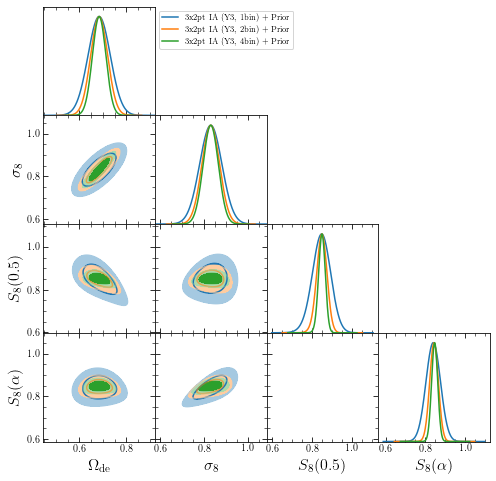

In [12]:
fishers = [fishers_dict[key] for key in ['Y3IAsingle3x2ptPrior', 'Y3IAdouble3x2ptPrior', 'Y3IAquadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8', 'S8opt'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3IAsingle3x2ptPrior_fY3IAdouble3x2ptPrior_fY3IAquadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

Optimizing alpha of S8 to 0.2991330931395223
Optimizing alpha of S8 to 0.3748191109665799
Optimizing alpha of S8 to 0.43490534273888054
Optimizing alpha of S8 to 0.2991330931395223
Optimizing alpha of S8 to 0.3748191109665799
Optimizing alpha of S8 to 0.43490534273888054
Optimizing alpha of S8 to 0.2991330931395223
Optimizing alpha of S8 to 0.3748191109665799
Optimizing alpha of S8 to 0.43490534273888054
Optimizing alpha of S8 to 0.2991330931395223
Optimizing alpha of S8 to 0.3748191109665799
Optimizing alpha of S8 to 0.43490534273888054


,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$
"3x2pt IA (Y1, 1bin) + Prior",0.06143,0.05232,0.05299,0.04456
"3x2pt IA (Y1, 2bin) + Prior",0.05554,0.04807,0.03267,0.02831
"3x2pt IA (Y1, 4bin) + Prior",0.04881,0.03924,0.02010,0.01914


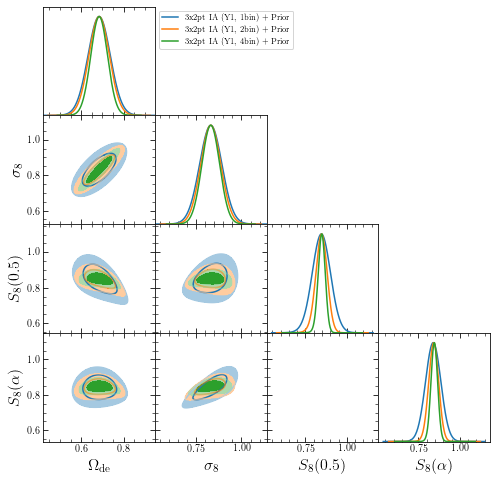

In [12]:
fishers = [fishers_dict[key] for key in ['Y1IAsingle3x2ptPrior', 'Y1IAdouble3x2ptPrior', 'Y1IAquadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8', 'S8opt'], 
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY3IAsingle3x2ptPrior_fY3IAdouble3x2ptPrior_fY3IAquadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

Optimizing alpha of S8 to 0.2888400584008088
Optimizing alpha of S8 to 0.32144732875509213
Optimizing alpha of S8 to 0.2888400584008088
Optimizing alpha of S8 to 0.32144732875509213
Optimizing alpha of S8 to 0.2888400584008088
Optimizing alpha of S8 to 0.32144732875509213
Optimizing alpha of S8 to 0.2888400584008088
Optimizing alpha of S8 to 0.32144732875509213


,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$
"3x2pt IA (Y3, 1bin) + Prior",0.05092,0.04769,0.04493,0.03494
"3x2pt IA (Y3, 1bin) + Tight Prior",0.05059,0.04568,0.03868,0.03174


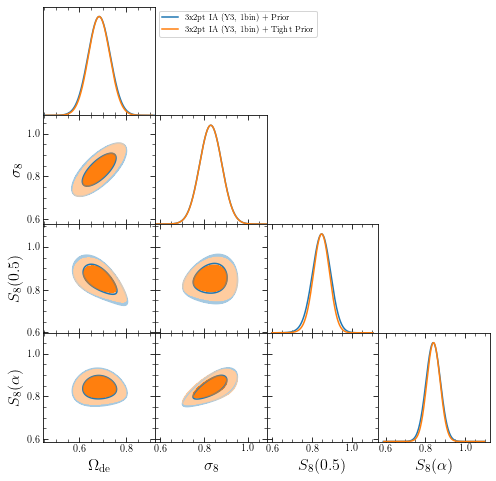

In [22]:
fishers = [fishers_dict[key] for key in ['Y3IAsingle3x2ptPrior', 'Y3IAsingle3x2ptPriorT']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8', 'S8opt'], 
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY3IAsingle3x2ptPrior_fY3IAdouble3x2ptPrior_fY3IAquadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

Optimizing alpha of S8 to 0.3599695285581867
Optimizing alpha of S8 to 0.3654601308416607
Optimizing alpha of S8 to 0.3599695285581867
Optimizing alpha of S8 to 0.3654601308416607
Optimizing alpha of S8 to 0.3599695285581867
Optimizing alpha of S8 to 0.3654601308416607
Optimizing alpha of S8 to 0.3599695285581867
Optimizing alpha of S8 to 0.3654601308416607


,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$
"3x2pt IA (Y3, 2bin) + Prior",0.04040,0.03628,0.02455,0.02059
"3x2pt IA (Y3, 2bin) + Tight Prior",0.04039,0.03606,0.02376,0.01980


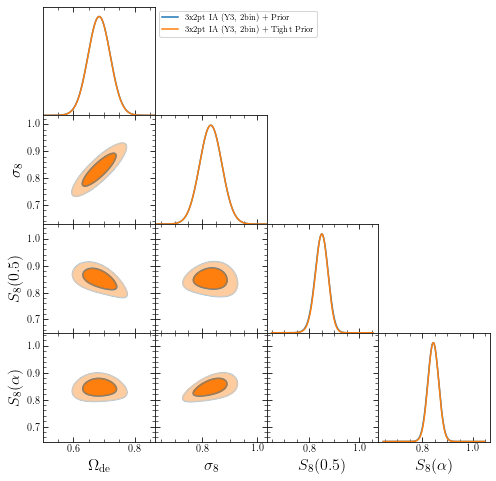

In [23]:
fishers = [fishers_dict[key] for key in ['Y3IAdouble3x2ptPrior', 'Y3IAdouble3x2ptPriorT']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8', 'S8opt'], 
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY3IAsingle3x2ptPrior_fY3IAdouble3x2ptPrior_fY3IAquadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

Optimizing alpha of S8 to 0.41505488894357995
Optimizing alpha of S8 to 0.4150731443476091
Optimizing alpha of S8 to 0.41505488894357995
Optimizing alpha of S8 to 0.4150731443476091
Optimizing alpha of S8 to 0.41505488894357995
Optimizing alpha of S8 to 0.4150731443476091
Optimizing alpha of S8 to 0.41505488894357995
Optimizing alpha of S8 to 0.4150731443476091


,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$
"3x2pt IA (Y3, 4bin) + Prior",0.03476,0.02877,0.01568,0.01431
"3x2pt IA (Y3, 4bin) + Tight Prior",0.03476,0.02877,0.01568,0.01431


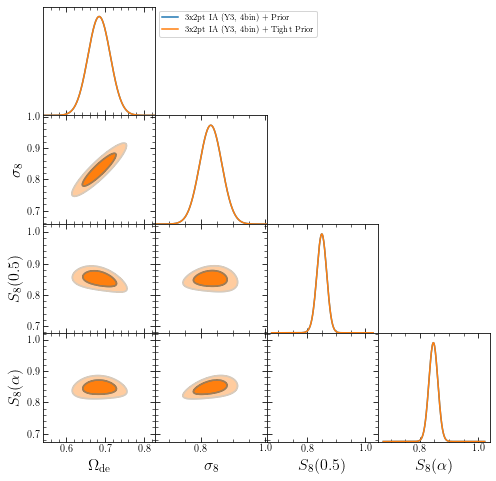

In [24]:
fishers = [fishers_dict[key] for key in ['Y3IAquadruple3x2ptPrior', 'Y3IAquadruple3x2ptPriorT']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8', 'S8opt'], 
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY3IAsingle3x2ptPrior_fY3IAdouble3x2ptPrior_fY3IAquadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

Optimizing alpha of S8 to 0.2888400584008088
Optimizing alpha of S8 to 0.32144732875509213
Optimizing alpha of S8 to 0.2888400584008088
Optimizing alpha of S8 to 0.32144732875509213
Optimizing alpha of S8 to 0.2888400584008088
Optimizing alpha of S8 to 0.32144732875509213
Optimizing alpha of S8 to 0.2888400584008088
Optimizing alpha of S8 to 0.32144732875509213


,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$,$A_\mathrm{IA}$,$\eta_\mathrm{IA}$
"3x2pt IA (Y3, 1bin) + Prior",0.05092,0.04769,0.04493,0.03494,81.33826,203.84399
"3x2pt IA (Y3, 1bin) + Tight Prior",0.05059,0.04568,0.03868,0.03174,2.84459,4.72222


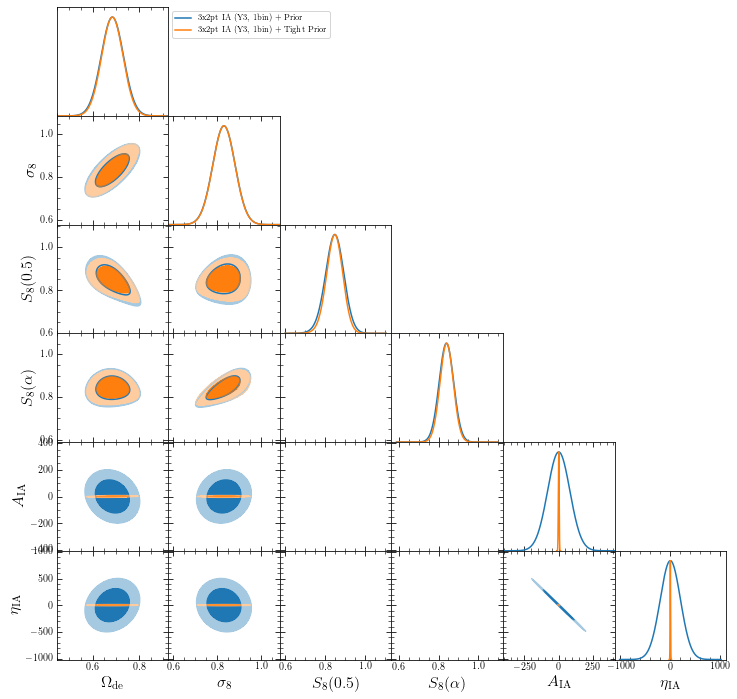

In [25]:
fishers = [fishers_dict[key] for key in ['Y3IAsingle3x2ptPrior', 'Y3IAsingle3x2ptPriorT']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8', 'S8opt', 'A_IA', 'eta_IA'], 
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY3IAsingle3x2ptPrior_fY3IAdouble3x2ptPrior_fY3IAquadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt', 'A_IA', 'eta_IA'])

Optimizing alpha of S8 to 0.41505488894357995
Optimizing alpha of S8 to 0.4150731443476091
Optimizing alpha of S8 to 0.41505488894357995
Optimizing alpha of S8 to 0.4150731443476091
Optimizing alpha of S8 to 0.41505488894357995
Optimizing alpha of S8 to 0.4150731443476091
Optimizing alpha of S8 to 0.41505488894357995
Optimizing alpha of S8 to 0.4150731443476091


,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$,$A_\mathrm{IA}$,$\eta_\mathrm{IA}$
"3x2pt IA (Y3, 4bin) + Prior",0.03476,0.02877,0.01568,0.01431,0.07391,0.29781
"3x2pt IA (Y3, 4bin) + Tight Prior",0.03476,0.02877,0.01568,0.01431,0.07386,0.29727


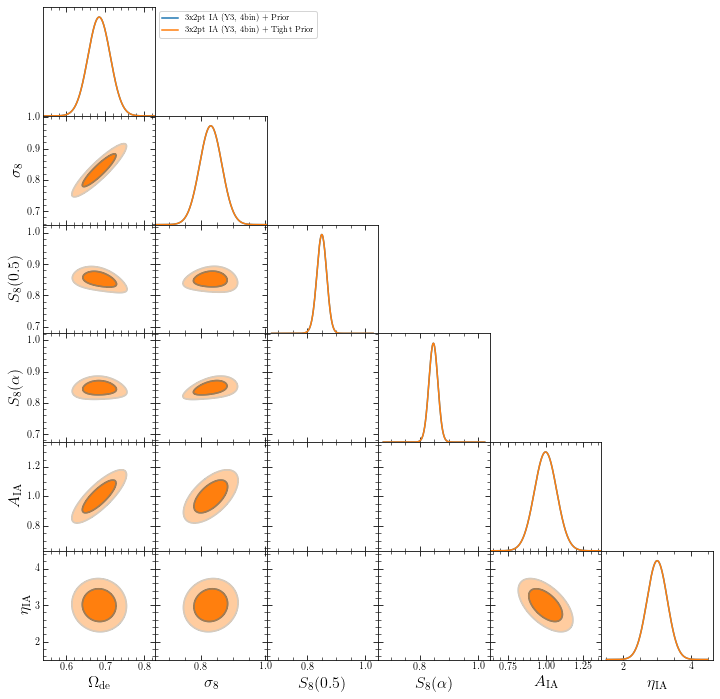

In [26]:
fishers = [fishers_dict[key] for key in ['Y3IAquadruple3x2ptPrior', 'Y3IAquadruple3x2ptPriorT']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8', 'S8opt','A_IA','eta_IA'], 
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY3IAsingle3x2ptPrior_fY3IAdouble3x2ptPrior_fY3IAquadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt','A_IA','eta_IA'])

Optimizing alpha of S8 to 0.2991330931395223
Optimizing alpha of S8 to 0.3748191109665799
Optimizing alpha of S8 to 0.2991330931395223
Optimizing alpha of S8 to 0.3748191109665799
Optimizing alpha of S8 to 0.2991330931395223
Optimizing alpha of S8 to 0.3748191109665799
Optimizing alpha of S8 to 0.2991330931395223
Optimizing alpha of S8 to 0.3748191109665799


,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$
"3x2pt IA (Y1, 1bin) + Prior",0.06143,0.05232,0.05299,0.04456
"3x2pt IA (Y1, 2bin) + Prior",0.05554,0.04807,0.03267,0.02831


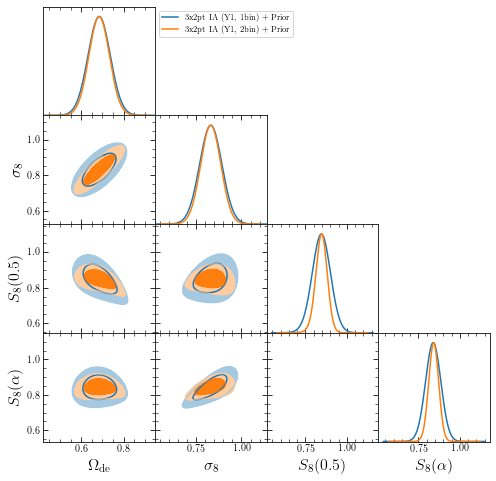

In [13]:
fishers = [fishers_dict[key] for key in ['Y1IAsingle3x2ptPrior', 'Y1IAdouble3x2ptPrior']]#, 'Y1IAquadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8', 'S8opt'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY1IAsingle3x2ptPrior_fY1IAdouble3x2ptPrior_fY1IAquadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

In [14]:
fishers = [fishers_dict[key] for key in ['Y3IAsingle3x2ptPrior', 'Y3IAdouble3x2ptPrior', 'Y3IAquadruple3x2ptPrior']]
df = hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

print(df.to_latex(escape=False))

with open('figures/Y3IA_single_double_quadruple_table.tex', 'w') as f:
    f.write(df.to_latex(escape=False))
    
df

Optimizing alpha of S8 to 0.2888400584008088
Optimizing alpha of S8 to 0.3599695285581867
Optimizing alpha of S8 to 0.41505488894357995
\begin{tabular}{lllll}
\toprule
{} & $\sigma_8$ & $\Omega_\mathrm{de}$ & $S_8(0.5)$ & $S_8(\alpha)$ \\
\midrule
3x2pt IA (Y3, 1bin) + Prior &    0.05092 &              0.04769 &    0.04493 &       0.03494 \\
3x2pt IA (Y3, 2bin) + Prior &    0.04040 &              0.03628 &    0.02455 &       0.02059 \\
3x2pt IA (Y3, 4bin) + Prior &    0.03476 &              0.02877 &    0.01568 &       0.01431 \\
\bottomrule
\end{tabular}



,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$
"3x2pt IA (Y3, 1bin) + Prior",0.05092,0.04769,0.04493,0.03494
"3x2pt IA (Y3, 2bin) + Prior",0.04040,0.03628,0.02455,0.02059
"3x2pt IA (Y3, 4bin) + Prior",0.03476,0.02877,0.01568,0.01431


In [15]:
fishers = [fishers_dict[key] for key in ['Y3IAsingle1x2ptPrior', 'Y3IAsingle2x2ptPrior','Y3IAsingle3x2ptPrior',
                                         'Y3IAdouble1x2ptPrior', 'Y3IAdouble2x2ptPrior', 'Y3IAdouble3x2ptPrior', 
                                         'Y3IAquadruple1x2ptPrior', 'Y3IAquadruple2x2ptPrior', 'Y3IAquadruple3x2ptPrior']]
df = hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

print(df.to_latex(escape=False))

with open('figures/Y3IA_single_double_quadruple_table_joint.tex', 'w') as f:
    f.write(df.to_latex(escape=False))
    
df

Optimizing alpha of S8 to 0.34534102631123686
Optimizing alpha of S8 to 0.5528246742556557
Optimizing alpha of S8 to 0.2888400584008088
Optimizing alpha of S8 to 0.40889872681508943
Optimizing alpha of S8 to 0.5279053138279416
Optimizing alpha of S8 to 0.3599695285581867
Optimizing alpha of S8 to 0.4285985407714828
Optimizing alpha of S8 to 0.5281409424083892
Optimizing alpha of S8 to 0.41505488894357995
\begin{tabular}{lllll}
\toprule
{} & $\sigma_8$ & $\Omega_\mathrm{de}$ & $S_8(0.5)$ & $S_8(\alpha)$ \\
\midrule
Cosmic Shear IA (Y3, 1bin) + Prior &    0.71670 &              0.78618 &    0.32322 &       0.37943 \\
2x2pt IA (Y3, 1bin) + Prior        &    0.11570 &              0.05934 &    0.07713 &       0.07713 \\
3x2pt IA (Y3, 1bin) + Prior        &    0.05092 &              0.04769 &    0.04493 &       0.03494 \\
Cosmic Shear IA (Y3, 2bin) + Prior &    0.09752 &              0.08744 &    0.03442 &       0.03060 \\
2x2pt IA (Y3, 2bin) + Prior        &    0.10195 &              0.058

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$
"Cosmic Shear IA (Y3, 1bin) + Prior",0.71670,0.78618,0.32322,0.37943
"2x2pt IA (Y3, 1bin) + Prior",0.11570,0.05934,0.07713,0.07713
"3x2pt IA (Y3, 1bin) + Prior",0.05092,0.04769,0.04493,0.03494
"Cosmic Shear IA (Y3, 2bin) + Prior",0.09752,0.08744,0.03442,0.03060
"2x2pt IA (Y3, 2bin) + Prior",0.10195,0.05822,0.06197,0.06197
"3x2pt IA (Y3, 2bin) + Prior",0.04040,0.03628,0.02455,0.02059
"Cosmic Shear IA (Y3, 4bin) + Prior",0.04593,0.03818,0.01711,0.01531
"2x2pt IA (Y3, 4bin) + Prior",0.10216,0.05823,0.06210,0.06210
"3x2pt IA (Y3, 4bin) + Prior",0.03476,0.02877,0.01568,0.01431


## 1x2pt vs 2x2pt vs 3x2pt in quadruple source bin

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"Cosmic Shear IA (Y3, 4bin) + Prior",0.04593,0.03818,0.01711
"2x2pt IA (Y3, 4bin) + Prior",0.10216,0.05823,0.06210
"3x2pt IA (Y3, 4bin) + Prior",0.03476,0.02877,0.01568


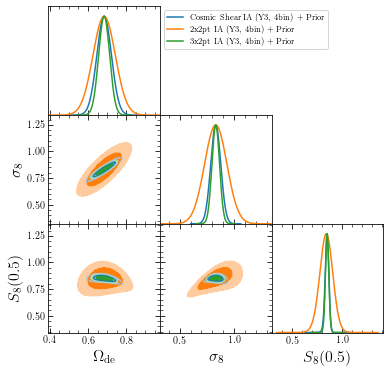

In [16]:
fishers = [fishers_dict[key] for key in ['Y3IAquadruple1x2ptPrior','Y3IAquadruple2x2ptPrior','Y3IAquadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3IAquadruple1x2ptPrior_fY3IAquadruple2x2ptPrior_fY3IAquadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"Cosmic Shear IA (Y1, 4bin) + Prior",0.07626,0.06148,0.02393
"2x2pt IA (Y1, 4bin) + Prior",0.13271,0.05941,0.09888
"3x2pt IA (Y1, 4bin) + Prior",0.04881,0.03924,0.02010


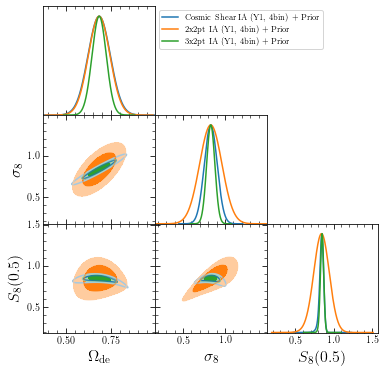

In [17]:
fishers = [fishers_dict[key] for key in ['Y1IAquadruple1x2ptPrior','Y1IAquadruple2x2ptPrior','Y1IAquadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY1IAquadruple1x2ptPrior_fY1IAquadruple2x2ptPrior_fY1IAquadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

## 1x2pt vs 2x2pt vs 3x2pt in double source bin

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"Cosmic Shear IA (Y3, 2bin) + Prior",0.09752,0.08744,0.03442
"2x2pt IA (Y3, 2bin) + Prior",0.10195,0.05822,0.06197
"3x2pt IA (Y3, 2bin) + Prior",0.04040,0.03628,0.02455


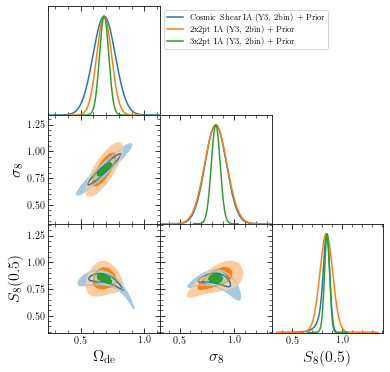

In [18]:
fishers = [fishers_dict[key] for key in ['Y3IAdouble1x2ptPrior','Y3IAdouble2x2ptPrior','Y3IAdouble3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3IAdouble1x2ptPrior_fY3IAdouble2x2ptPrior_fY3IAdouble3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"Cosmic Shear IA (Y1, 2bin) + Prior",0.17437,0.15894,0.06838
"2x2pt IA (Y1, 2bin) + Prior",0.13271,0.05941,0.09888
"3x2pt IA (Y1, 2bin) + Prior",0.05554,0.04807,0.03267


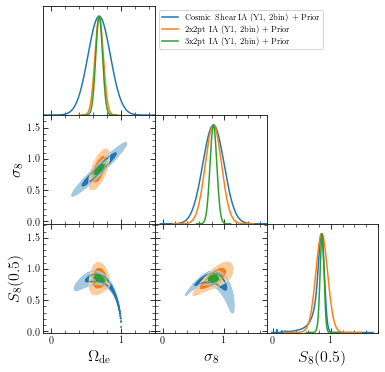

In [19]:
fishers = [fishers_dict[key] for key in ['Y1IAdouble1x2ptPrior','Y1IAdouble2x2ptPrior','Y1IAdouble3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY1IAdouble1x2ptPrior_fY1IAdouble2x2ptPrior_fY1IAdouble3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

In [20]:
1-(0.02059/0.03536)

0.41770361990950233

In [21]:
1-(0.01608/0.03536)

0.5452488687782806